In [49]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.utils import shuffle

import pandas as pd
import matplotlib.pyplot as plt
import copy

from utility import random_forest_classifer

In [2]:
data_train = pd.read_csv('data/train2.csv',index_col=0)
#data_test = pd.read_csv('data/test2.csv',index_col=0)

In [3]:
list_constant_attributes =['ind_var2_0', 'ind_var2', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 
                           'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var27_0', 'num_var28_0', 'num_var28', 
                           'num_var27', 'num_var41', 'num_var46_0', 'num_var46', 'saldo_var28', 'saldo_var27', 
                           'saldo_var41', 'saldo_var46', 'imp_amort_var18_hace3', 'imp_amort_var34_hace3', 
                           'imp_reemb_var13_hace3', 'imp_reemb_var33_hace3', 'imp_trasp_var17_out_hace3', 
                           'imp_trasp_var33_out_hace3', 'num_var2_0_ult1', 'num_var2_ult1', 
                           'num_reemb_var13_hace3', 'num_reemb_var33_hace3', 
                           'num_trasp_var17_out_hace3', 'num_trasp_var33_out_hace3', 'saldo_var2_ult1', 
                           'saldo_medio_var13_medio_hace3']

list_binary_attributes = ['ind_var1_0', 'ind_var1', 'ind_var5_0', 'ind_var5', 'ind_var6_0', 
                          'ind_var6', 'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12', 
                          'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo_0', 
                          'ind_var13_largo', 'ind_var13_medio_0', 'ind_var13_medio', 'ind_var13', 
                          'ind_var14_0', 'ind_var14', 'ind_var17_0', 'ind_var17', 'ind_var18_0', 'ind_var18', 
                          'ind_var19', 'ind_var20_0', 'ind_var20', 'ind_var24_0', 'ind_var24', 'ind_var25_cte', 
                          'ind_var26_0', 'ind_var26_cte', 'ind_var26', 'ind_var25_0', 'ind_var25', 'ind_var29_0', 
                          'ind_var29', 'ind_var30_0', 'ind_var30', 'ind_var31_0', 'ind_var31', 'ind_var32_cte', 
                          'ind_var32_0', 'ind_var32', 'ind_var33_0', 'ind_var33', 'ind_var34_0', 'ind_var34', 
                          'ind_var37_cte', 'ind_var37_0', 'ind_var37', 'ind_var39_0', 'ind_var40_0', 'ind_var40', 
                          'ind_var41_0', 'ind_var39', 'ind_var44_0', 'ind_var44', 'num_var6_0', 'num_var6', 
                          'num_var8', 'num_var13_medio_0', 'num_var13_medio', 'num_var18_0', 'num_var18', 
                          'num_var20_0', 'num_var20', 'num_var29_0', 'num_var29', 'num_var34_0', 'num_var34', 
                          'num_var40', 'num_var39', 'num_var44', 'delta_imp_amort_var18_1y3', 
                          'delta_imp_amort_var34_1y3', 'delta_imp_reemb_var13_1y3', 
                          'delta_imp_reemb_var33_1y3', 'delta_imp_trasp_var17_out_1y3', 
                          'delta_imp_trasp_var33_out_1y3', 'delta_num_reemb_var13_1y3', 
                          'delta_num_reemb_var33_1y3', 'delta_num_trasp_var17_out_1y3', 
                          'delta_num_trasp_var33_out_1y3', 'imp_reemb_var17_hace3', 'imp_reemb_var33_ult1', 
                          'imp_trasp_var33_out_ult1', 'ind_var7_emit_ult1', 'ind_var7_recib_ult1', 
                          'ind_var10_ult1', 'ind_var10cte_ult1', 'ind_var9_cte_ult1', 'ind_var9_ult1', 
                          'ind_var43_emit_ult1', 'ind_var43_recib_ult1', 'num_var7_emit_ult1', 
                          'num_meses_var13_medio_ult3', 'num_reemb_var13_ult1', 'num_reemb_var17_hace3', 
                          'num_reemb_var33_ult1', 'num_trasp_var17_in_ult1', 
                           'num_trasp_var17_out_ult1', 'num_trasp_var33_in_hace3', 'num_trasp_var33_out_ult1', 
                          'saldo_medio_var29_hace3']
import copy
list_binary_attributes_with_target = copy.deepcopy(list_binary_attributes)
list_binary_attributes_with_target.append('TARGET')

In [73]:
filtering_binary =data_train.apply(pd.Series.nunique) ==2
data_train_binary_feature=data_train.loc[:,filtering_binary]

filtering_nobinary =data_train.apply(pd.Series.nunique) >2
filtering_nobinary ['TARGET']=True
data_train_nobinary_feature=data_train.loc[:,filtering_nobinary]

In [ ]:
matrix_features = data_train_nobinary_feature.as_matrix()[:,:-1]
labels = data_train_nobinary_feature['TARGET'].as_matrix()
f1_score_list,confusion_matrix_list = random_forest_classifer(matrix_features,labels)

#The score method used in this case is the F1 score, which is the harmonic mean of precision and recall#The sc 
F1_accuracy_str="F1 accuracy: %0.3f (+/- %0.3f)" % (np.mean(f1_score_list),
                                                    np.std(f1_score_list) * 2)
F1_accuracy = np.mean(f1_score_list)
print(F1_accuracy_str)

In [56]:
print('Data train initial shape',data_train.shape)
data_train_drop_noconstant_colums = data_train.drop(list_constant_attributes,axis=1)
print('Data train new shape after dropping constant feature',data_train_drop_noconstant_colums.shape)
data_train_numeric_feature = data_train_drop_noconstant_colums.drop(list_binary_attributes,axis=1)
print('Data train new shape only numeric feature',data_train_numeric_feature.shape)
data_train_only_binary_feature = data_train_drop_constant_colums.loc[:,list_binary_attributes_with_target]
print('Data train new shape only binary feature',data_train_only_binary_feature.shape)

Data train initial shape (76020, 370)
Data train new shape after dropping constant feature (76020, 336)
Data train new shape only numeric feature (76020, 231)
Data train new shape only binary feature (76020, 106)


In [53]:
matrix_features = data_train_numeric_feature.as_matrix()[:,:-1]
labels = data_train_numeric_feature['TARGET'].as_matrix()
f1_score_list,confusion_matrix_list = random_forest_classifer(matrix_features,labels)

#The score method used in this case is the F1 score, which is the harmonic mean of precision and recall#The sc 
F1_accuracy_str="F1 accuracy: %0.3f (+/- %0.3f)" % (np.mean(f1_score_list),
                                                    np.std(f1_score_list) * 2)
F1_accuracy = np.mean(f1_score_list)
print(F1_accuracy_str)

F1 accuracy: 0.547 (+/- 0.010)


In [54]:
matrix_features = data_train_only_binary_feature.as_matrix()[:,:-1]
labels = data_train_only_binary_feature['TARGET'].as_matrix()
f1_score_list,confusion_matrix_list = random_forest_classifer(matrix_features,labels)

#The score method used in this case is the F1 score, which is the harmonic mean of precision and recall#The sc 
F1_accuracy_str="F1 accuracy: %0.3f (+/- %0.3f)" % (np.mean(f1_score_list),
                                                    np.std(f1_score_list) * 2)
F1_accuracy = np.mean(f1_score_list)
print(F1_accuracy_str)

F1 accuracy: 0.492 (+/- 0.008)


In [57]:
matrix_features = data_train_drop_noconstant_colums.as_matrix()[:,:-1]
labels = data_train_drop_noconstant_colums['TARGET'].as_matrix()
f1_score_list,confusion_matrix_list = random_forest_classifer(matrix_features,labels)

#The score method used in this case is the F1 score, which is the harmonic mean of precision and recall#The sc 
F1_accuracy_str="F1 accuracy: %0.3f (+/- %0.3f)" % (np.mean(f1_score_list),
                                                    np.std(f1_score_list) * 2)
F1_accuracy = np.mean(f1_score_list)
print(F1_accuracy_str)

F1 accuracy: 0.543 (+/- 0.004)


In [5]:
data_train_numeric_happy=data_train_numeric_feature.loc[data_train_numeric_feature['TARGET']==0]
print('Size happy:',data_train_numeric_happy.shape)
data_train_numeric_unhappy=data_train_numeric_feature.loc[data_train_numeric_feature['TARGET']==1]
print('Size unhappy:',data_train_numeric_unhappy.shape)

Size happy: (73012, 231)
Size unhappy: (3008, 231)


In [6]:
data_train_numeric_happy_max = data_train_numeric_unhappy.max()
data_train_numeric_happy_min = data_train_numeric_unhappy.min()
data_train_numeric_happy_median = data_train_numeric_unhappy.median()
data_train_numeric_unhappy_max = data_train_numeric_unhappy.max()
data_train_numeric_unhappy_min = data_train_numeric_unhappy.min()
data_train_numeric_unhappy_median = data_train_numeric_unhappy.median()

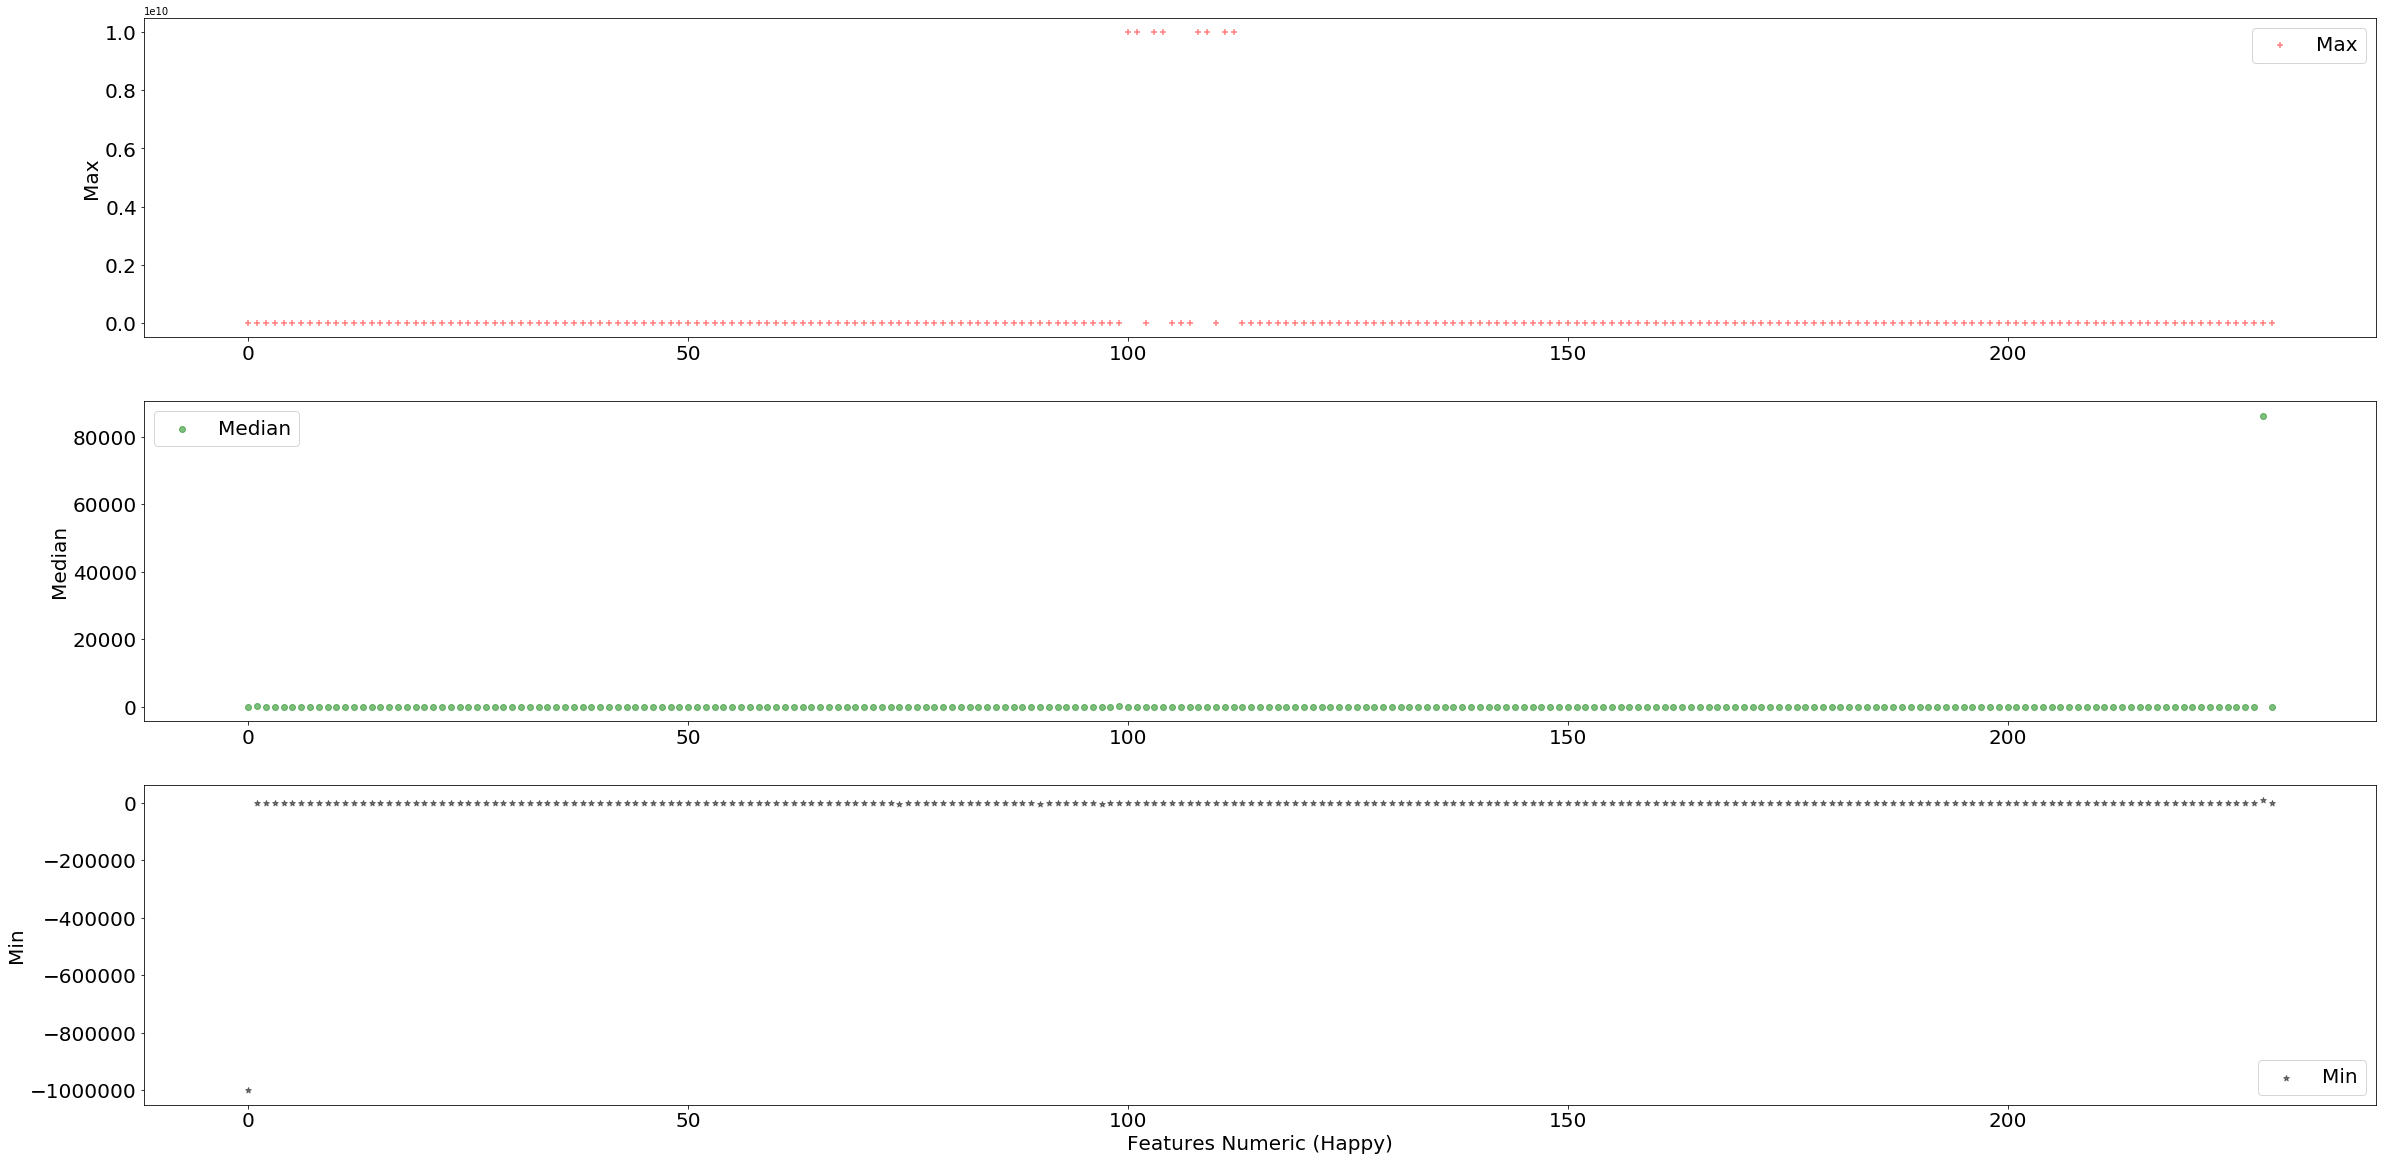

In [16]:
%matplotlib inline

x=[item for item in range(data_train_numeric_happy_max.shape[0])]


fig = plt.figure(figsize=(40, 20))
fig.tight_layout() 



ax1 = fig.add_subplot(311)
ax1.scatter(x, data_train_numeric_happy_max, c="red", alpha=0.5, marker='+',
            label="Max")
plt.ylabel("Max",fontsize=20)
plt.legend(loc='best',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax2 = fig.add_subplot(312,sharex=ax1)
ax2.scatter(x, data_train_numeric_happy_median, c="green", alpha=0.5, marker='o',
            label="Median")
plt.legend(loc='best',fontsize=20)
plt.ylabel("Median",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax3 = fig.add_subplot(313,sharex=ax1)
ax3.scatter(x, data_train_numeric_happy_min, c="black", alpha=0.5, marker='*',
            label="Min")
plt.ylabel("Min",fontsize=20)
plt.legend(loc='best',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel("Features Numeric (Happy)",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()


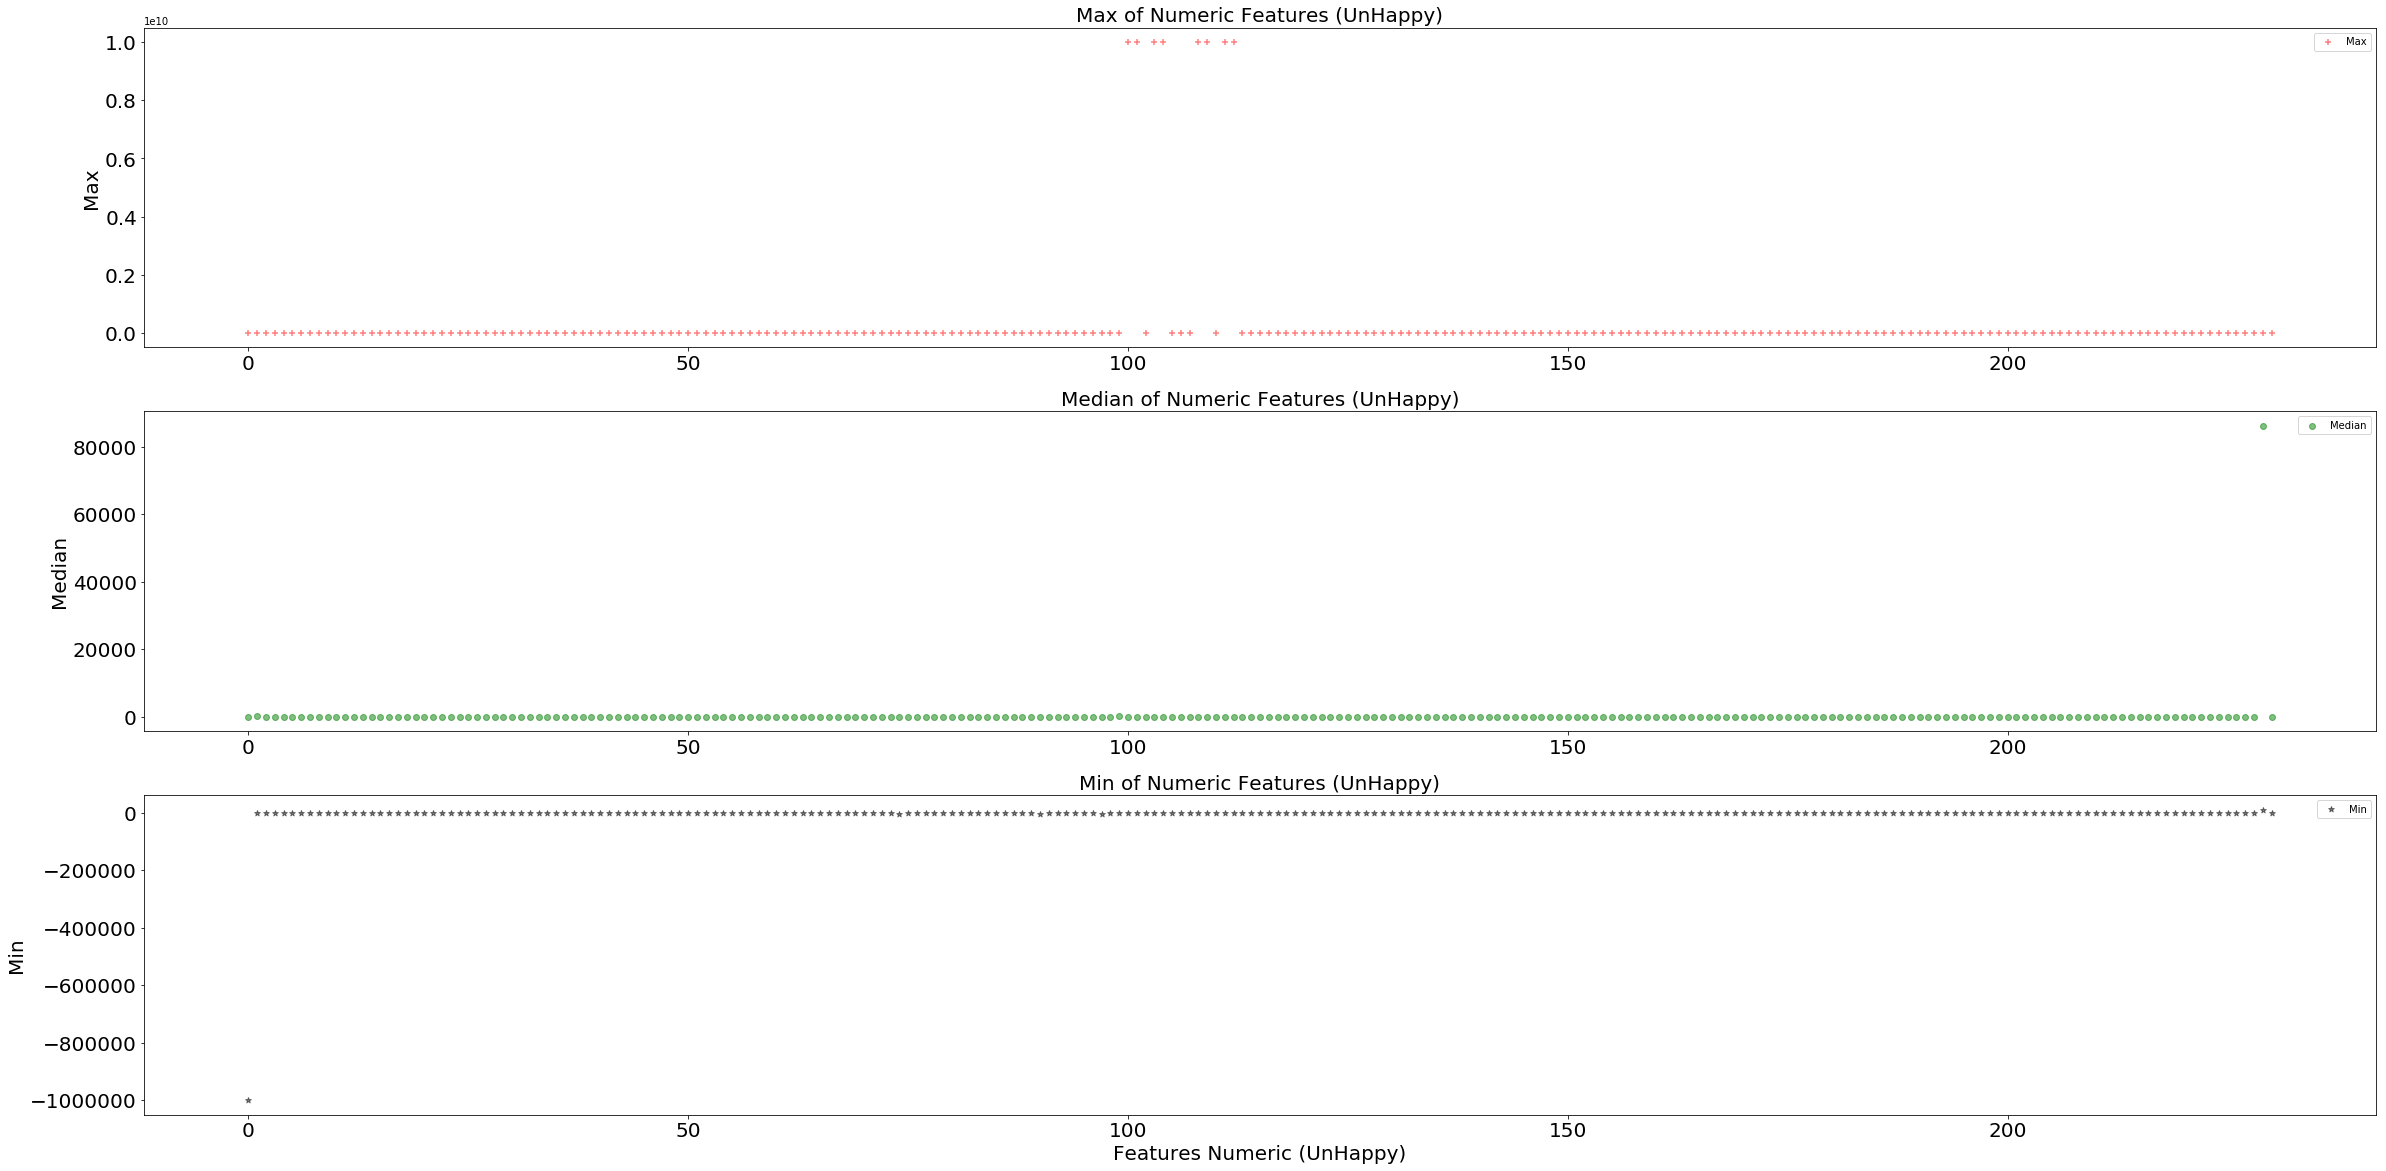

In [15]:
%matplotlib inline

x=[item for item in range(data_train_numeric_unhappy_max.shape[0])]


fig = plt.figure(figsize=(40, 20))
fig.tight_layout() 

ax1 = fig.add_subplot(311)

ax1.scatter(x, data_train_numeric_unhappy_max, c="red", alpha=0.5, marker='+',
            label="Max")
plt.ylabel("Max",fontsize=20)
plt.title('Max of Numeric Features (UnHappy)',fontsize=20)
plt.legend(loc='best')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax2 = fig.add_subplot(312,sharex=ax1)
ax2.scatter(x, data_train_numeric_unhappy_median, c="green", alpha=0.5, marker='o',
            label="Median")
plt.legend(loc='best')
plt.title('Median of Numeric Features (UnHappy)',fontsize=20)
plt.ylabel("Median",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax3 = fig.add_subplot(313,sharex=ax1)
ax3.scatter(x, data_train_numeric_unhappy_min, c="black", alpha=0.5, marker='*',
            label="Min")
plt.title('Min of Numeric Features (UnHappy)',fontsize=20)
plt.ylabel("Min",fontsize=20)
plt.legend(loc='best')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel("Features Numeric (UnHappy)",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()


These max/min values could be due to some errors, let us proceed with extreme value analysis, in order to remove some errors

* Extreme Value Analysis
* binary activation
* borgura


In [17]:
columns_numeric = data_train_numeric_feature.columns.tolist()
columns_numeric.remove('TARGET')

th_for_extreme_value_analysis = 1
th_extreme = 3
attributes_lower_value = []
attributes_lower_name = []
attributes_upper_value = []
attributes_upper_name = []
attributes_std_name = []
attributes_std_value = []


for colum in columns_numeric:
        data = data_train_numeric_feature.loc[:,colum]
        if not isinstance(data, pd.Series):
            print(colum)
        std = data.std()
        attributes_std_value.append(std)
        attributes_std_name.append(colum)
        IQR = data.quantile(0.75) - data.quantile(0.25)
        lower_bound = data.quantile(0.25) - (IQR * th_extreme)
        upper_bound = data.quantile(0.75) + (IQR * th_extreme)
        rare_lower = data[data<lower_bound].shape[0]
        rare_upper = data[data>upper_bound].shape[0]
        if rare_lower >= th_for_extreme_value_analysis:
            attributes_lower_value.append(rare_lower)
            attributes_lower_name.append(colum)
        if rare_upper >= th_for_extreme_value_analysis:
            attributes_upper_value.append(rare_upper)
            attributes_upper_name.append(colum)


In [18]:
print(len(attributes_lower_value))
print(len(attributes_lower_name))

34
34


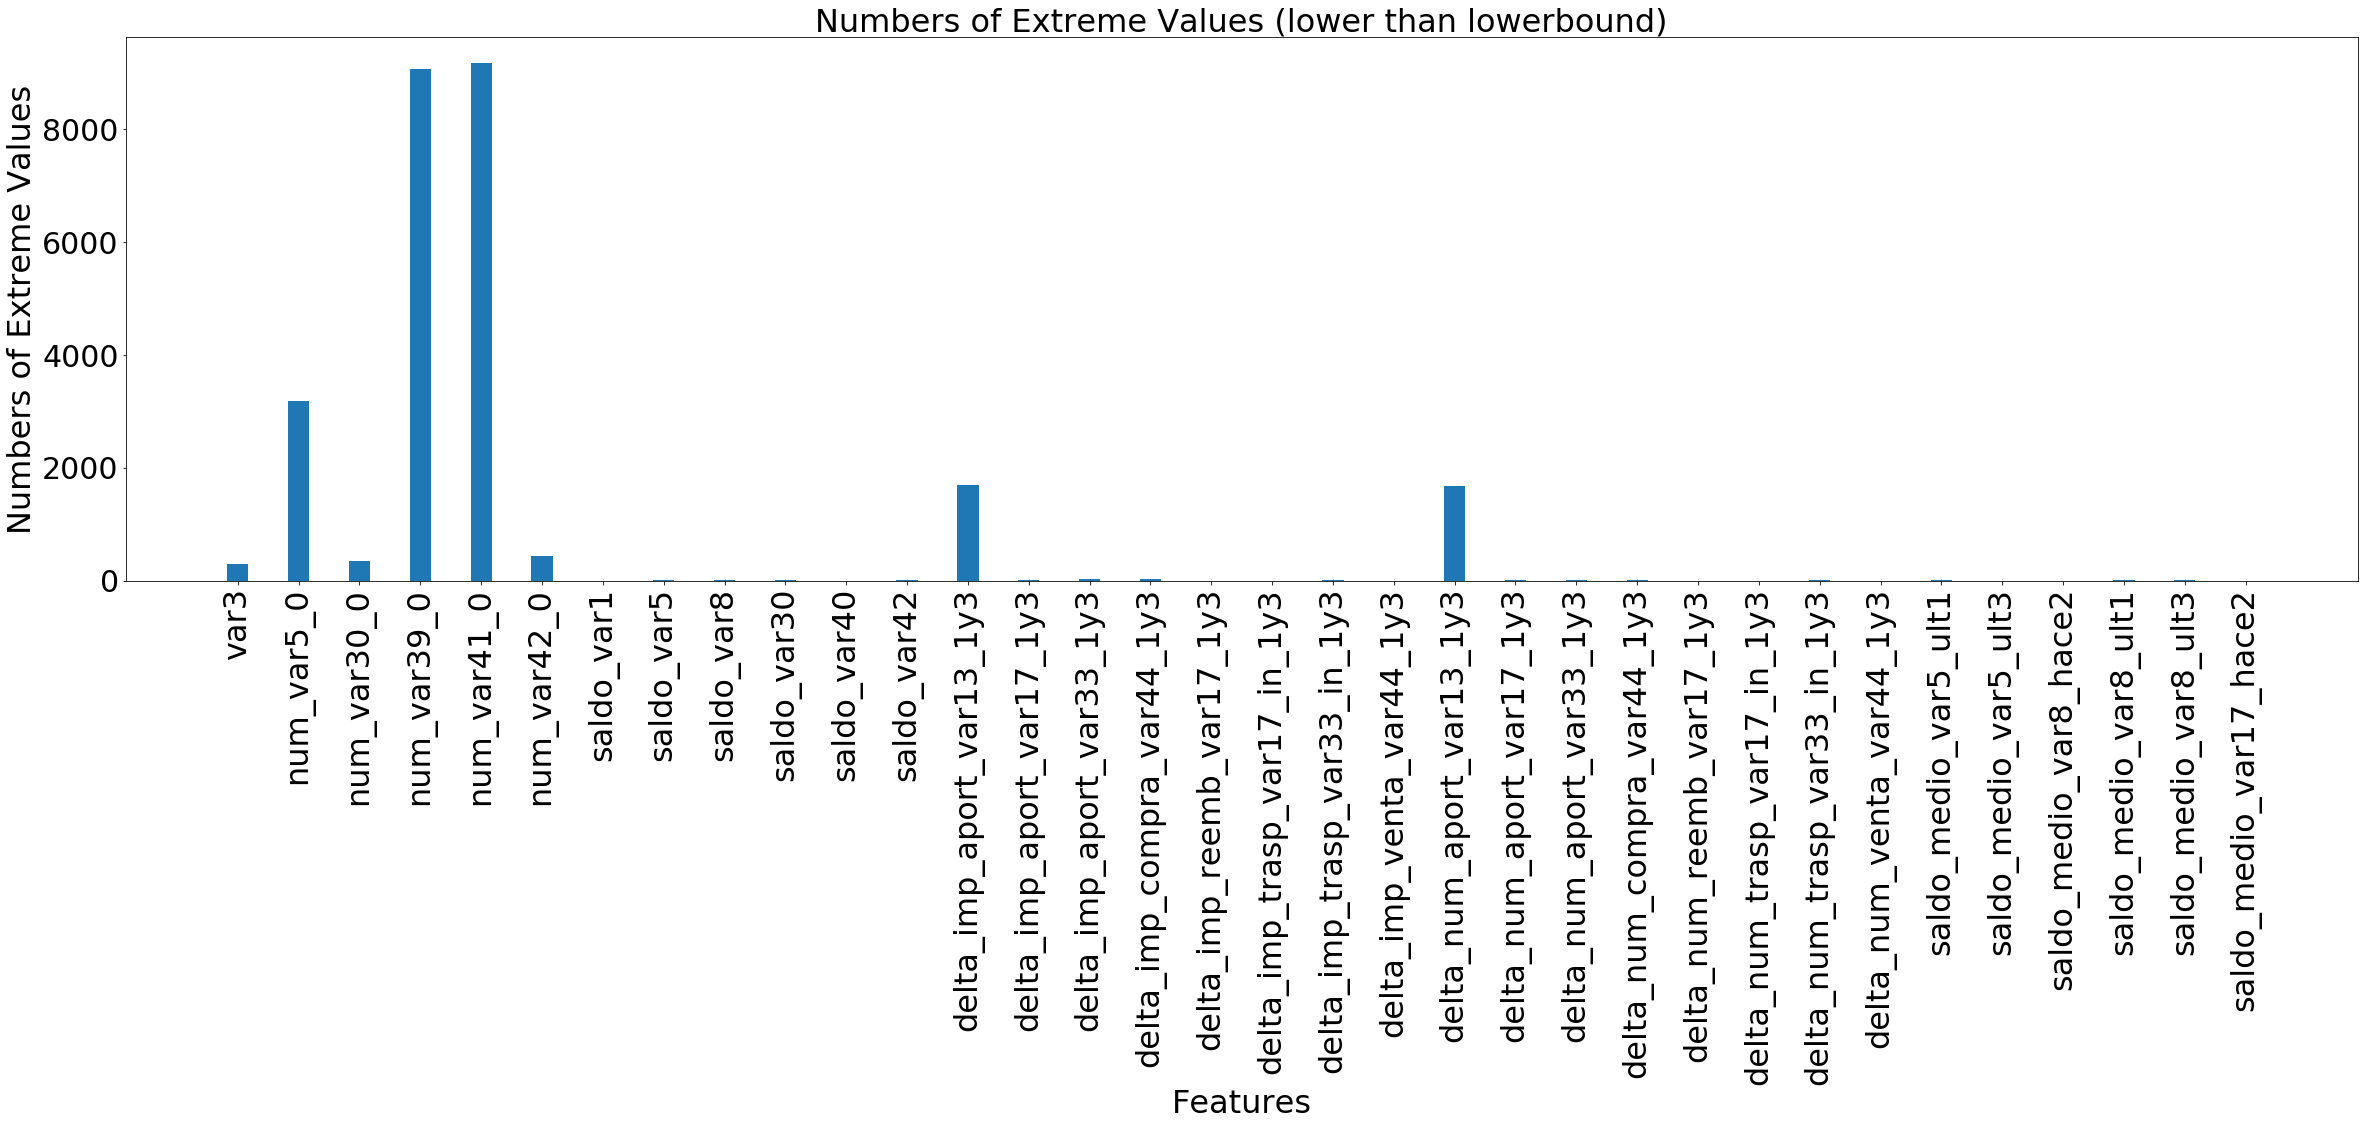

In [19]:
width = .35
plt.figure(figsize=(40, 10));
plt.tick_params(axis='y', labelsize=30);
plt.title('Numbers of Extreme Values (lower than lowerbound)',size=32);
ind = np.arange(len(attributes_lower_value))
plt.bar(ind, attributes_lower_value,width=width,align='center');
plt.xticks(np.arange(len(attributes_lower_name)), attributes_lower_name,rotation=90,size=32);
plt.ylabel('Numbers of Extreme Values',size=32);
plt.xlabel('Features',size=32);
plt.show()

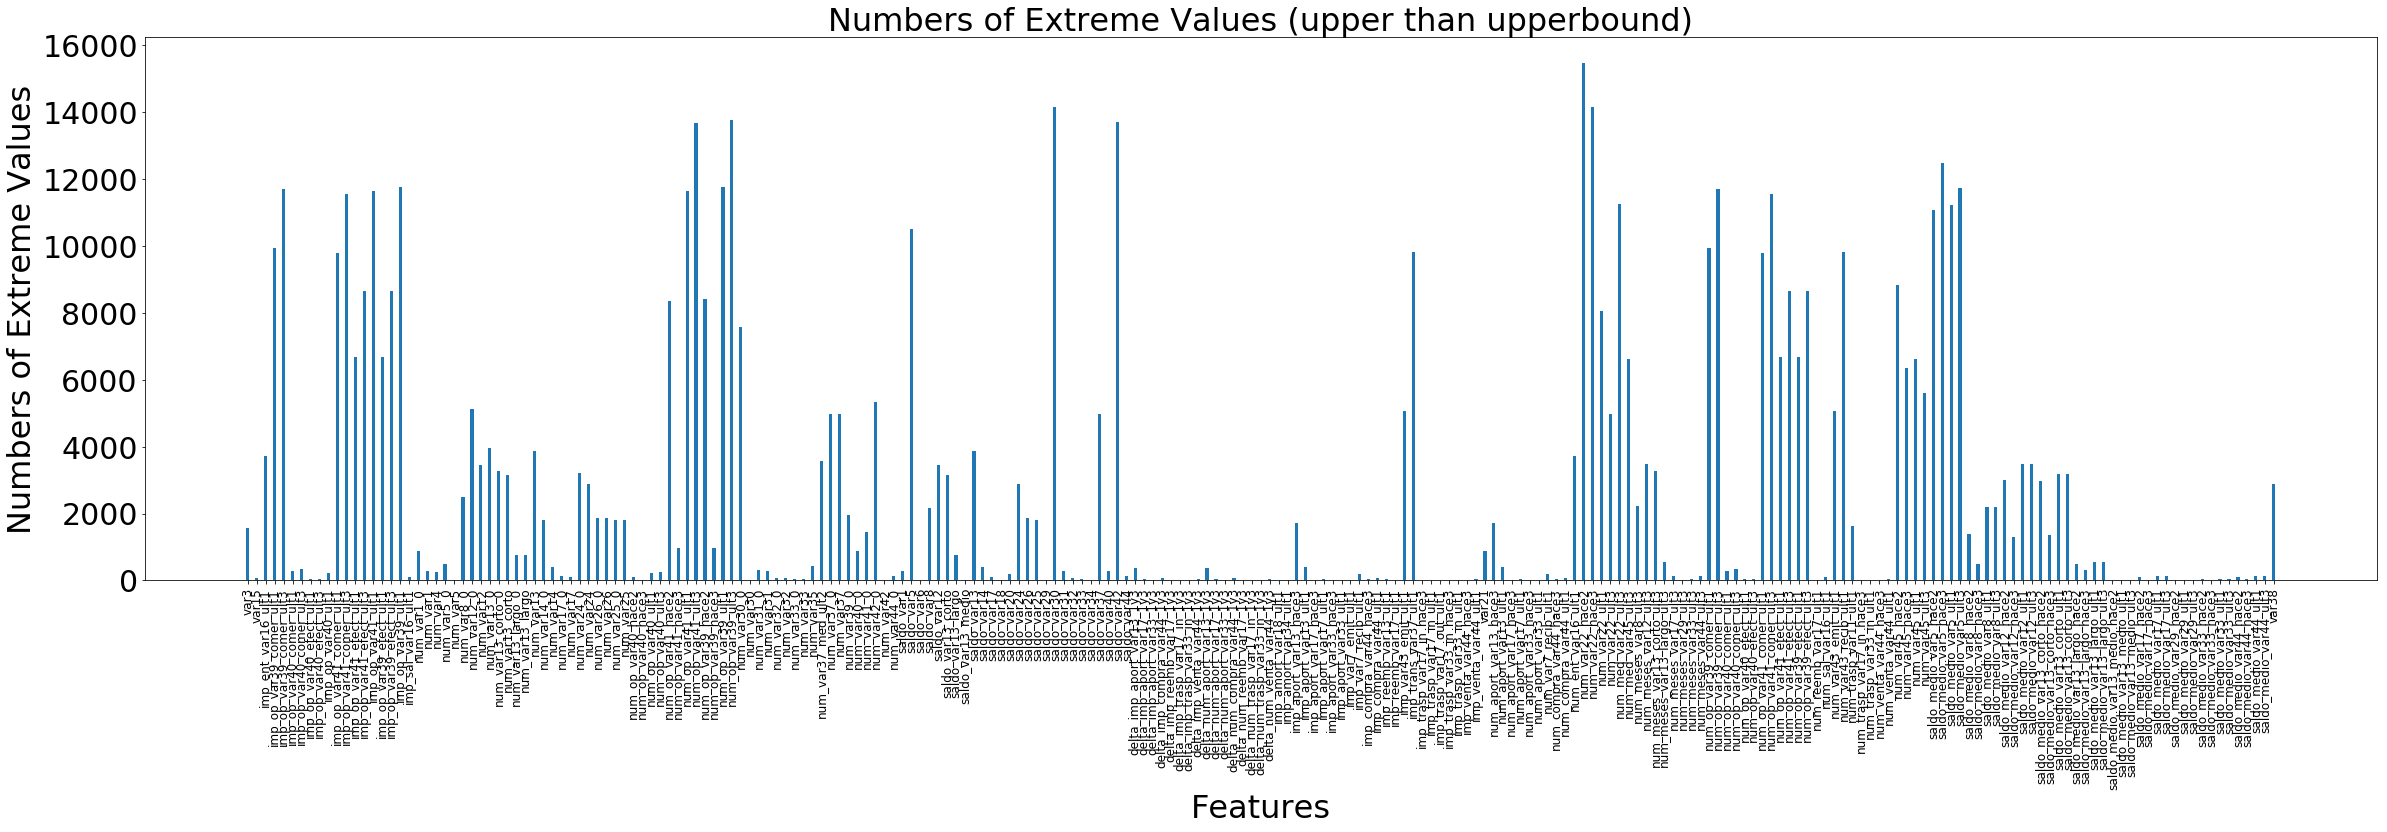

In [20]:
width = .35
plt.figure(figsize=(40, 10));
plt.tick_params(axis='y', labelsize=30);
plt.title('Numbers of Extreme Values (upper than upperbound)',size=32);
ind = np.arange(len(attributes_upper_value))
plt.bar(ind, attributes_upper_value,width=width,align='center');
plt.xticks(np.arange(len(attributes_upper_name)), attributes_upper_name,rotation=90,size=12);
plt.ylabel('Numbers of Extreme Values',size=32);
plt.xlabel('Features',size=32);
plt.show()

Check with excel

In [21]:
stats_col=data_train_numeric_feature.describe()
stats_col.to_csv('data/stat_numeric_attributes.csv')

Recognize std as a way to differenziate

In [22]:
print(len(attributes_lower_name))
print(len(attributes_upper_name))

34
227


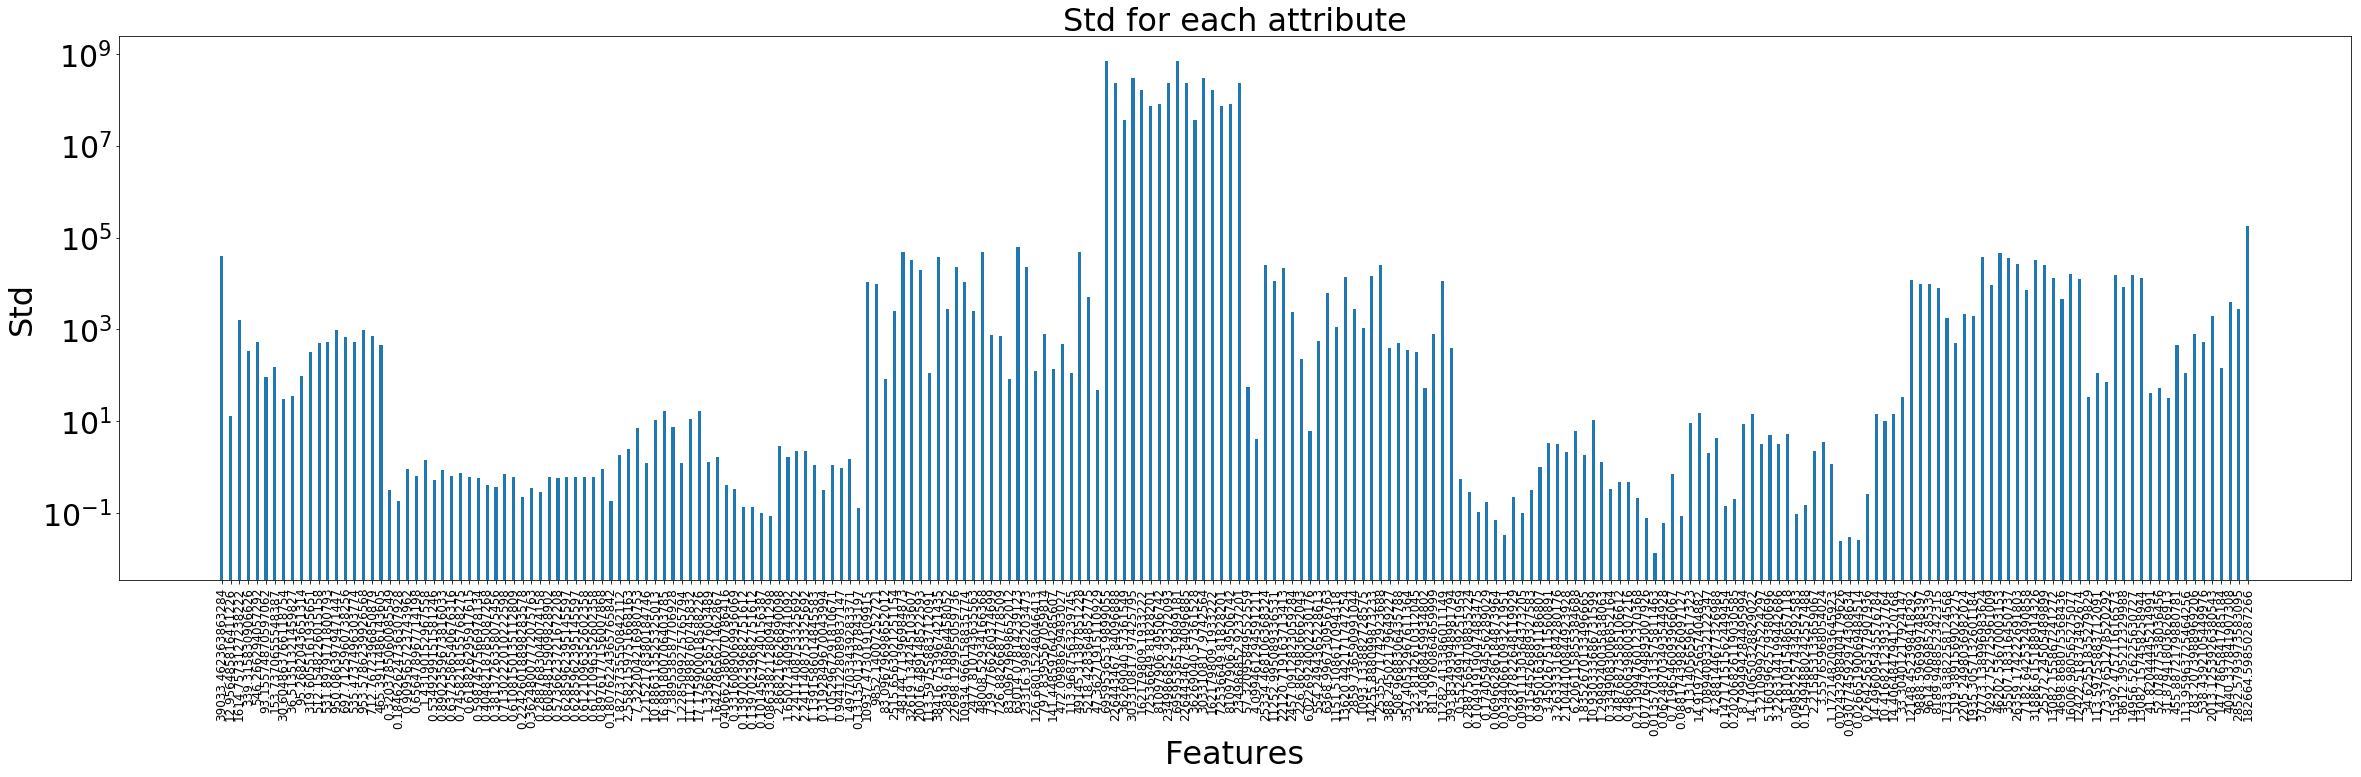

In [23]:
width = .35
fig = plt.figure(figsize=(40, 10))
fig.tight_layout() 
ax = fig.add_subplot(111)
ax.set_yscale("log", nonposy='clip')
ax.tick_params(axis='y', labelsize=30);
plt.title('Std for each attribute',size=32);
ind = np.arange(len(attributes_std_name))
ax.bar(ind, attributes_std_value,width=width,align='center');
plt.xticks(np.arange(len(attributes_std_name)), attributes_std_value,rotation=90,size=12);
plt.ylabel('Std',size=32);
plt.xlabel('Features',size=32);

Define a theshold for std using excel + visualization

http://sci2s.ugr.es/sites/default/files/files/Teaching/GraduatesCourses/SIGE/Other/2013-Garcia-IEEETKDE.pdf

https://ieeexplore.ieee.org/document/1269594/

https://github.com/lisette-espin/pychimerge

* http://sci2s.ugr.es/keel/pdf/algorithm/articulo/2008-Tsai-IS.pdf
* https://github.com/airysen/caimcaim

In [46]:
data_train_numeric_feature_clean = data_train_numeric_feature.copy()

In [50]:
median_value = data_train_numeric_feature_clean['var3'].median()
print('Median Value for var3\n',median_value)

print('Unique values for var3 before replacing\n',data_train_numeric_feature_clean['var3'].value_counts().head())
data_train_numeric_feature_clean['var3'].replace(to_replace=-999999,value=median_value,inplace=True)
print('Unique values for var3 after replacing\n',data_train_numeric_feature_clean['var3'].value_counts().head())

Median Value for var3
 2.0
Unique values for var3 before replacing
 2    74281
8      138
9      110
3      108
1      105
Name: var3, dtype: int64
Unique values for var3 after replacing
 2    74281
8      138
9      110
3      108
1      105
Name: var3, dtype: int64


In [51]:
matrix_features = data_train_numeric_feature_clean.as_matrix()[:,:-1]
labels = data_train_numeric_feature_clean['TARGET'].as_matrix()
f1_score_list,confusion_matrix_list = random_forest_classifer(matrix_features,labels)

In [52]:
#The score method used in this case is the F1 score, which is the harmonic mean of precision and recall#The sc 
F1_accuracy_str="F1 accuracy: %0.3f (+/- %0.3f)" % (np.mean(f1_score_list),
                                                    np.std(f1_score_list) * 2)
F1_accuracy = np.mean(f1_score_list)
print(F1_accuracy_str)

F1 accuracy: 0.544 (+/- 0.007)


In [24]:
th_std=200
list_name_attributes_to_check = []
for name_std,value_std in zip(attributes_std_name,attributes_std_value):
    if value_std>=th_std:
        list_name_attributes_to_check.append(name_std)
print('List attributes to check\n')
print('Len %d\n'%len(list_name_attributes_to_check))
print(list_name_attributes_to_check)

List attributes to check

Len 100

['var3', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1', 'imp_op_var39_comer_ult3', 'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'imp_sal_var16_ult1', 'saldo_var1', 'saldo_var5', 'saldo_var8', 'saldo_var12', 'saldo_var13_corto', 'saldo_var13_largo', 'saldo_var13', 'saldo_var14', 'saldo_var17', 'saldo_var18', 'saldo_var20', 'saldo_var24', 'saldo_var26', 'saldo_var25', 'saldo_var30', 'saldo_var31', 'saldo_var33', 'saldo_var37', 'saldo_var42', 'saldo_var44', 'delta_imp_aport_var13_1y3', 'delta_imp_aport_var17_1y3', 'delta_imp_aport_var33_1y3', 'delta_imp_compra_var44_1y3', 'delta_imp_reemb_var17_1y3', 'delta_imp_trasp_var17_in_1y3', 'delta_imp_trasp_var33_in_1y3', 'delta_imp_venta_var44_1y3', 'delta_num_aport_var13_1y3', 'delta_num_aport_var17_1y3', 'delta_num_aport_var33_1y3', 'delta_num_compra_v

print also the unique values

In [26]:
data_train_numeric_feature_filtered = data_train_numeric_feature.loc[:,list_name_attributes_to_check]
data_train_numeric_feature_filtered_unique_values = data_train_numeric_feature_filtered.apply(pd.Series.nunique)
stats_col_filtered = data_train_numeric_feature_filtered.describe()
stats_col_filtered.loc[stats_col_filtered.shape[0]]=data_train_numeric_feature_filtered_unique_values
stats_col_filtered.index.name ='stats'
stats_col_filtered=stats_col_filtered.rename({8: 'unique-value'}, axis='index')
stats_col_filtered.to_csv('data/stat_numeric_attributes_filtered.csv')
stats_col_filtered.head(10)

,var3,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,...,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var33_hace2,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
stats,,,,,,,,,,,,,,,,,,,,,
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,7.602000e+04,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04
mean,-1523.199277,86.208265,72.363067,119.529632,68.803937,113.056934,68.205140,113.225058,137.242763,68.618087,...,3.646318e+01,1.310316e+02,1.092169e+02,7.935824,12.215580,8.784074,31.505324,76.026165,56.614351,1.172358e+05
std,39033.462364,1614.757313,339.315831,546.266294,319.605516,512.154823,531.897917,950.086398,697.712596,535.473750,...,8.612395e+03,1.495653e+04,1.308216e+04,455.887218,783.207399,538.439211,2013.125393,4040.337842,2852.579397,1.826646e+05
min,-999999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05
75%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05
max,238.000000,210000.000000,12888.030000,21024.810000,12888.030000,16566.810000,45990.000000,131100.000000,47598.090000,45990.000000,...,2.368559e+06,3.998687e+06,3.525777e+06,50003.880000,138831.630000,91778.730000,438329.220000,681462.900000,397884.300000,2.203474e+07
unique-value,208.000000,596.000000,7551.000000,9099.000000,7421.000000,8961.000000,331.000000,454.000000,8032.000000,336.000000,...,1.800000e+01,1.190000e+02,1.190000e+02,43.000000,48.000000,48.000000,99.000000,141.000000,141.000000,5.773600e+04


Replace var3 9999 with median value

In [31]:
median_value = data_train_numeric_feature_filtered['var3'].median()
print('Median Value for var3\n',median_value)
print('Unique values for var3 before replacing\n',data_train_numeric_feature_filtered['var3'].value_counts().head())
data_train_numeric_feature_filtered['var3'].replace(to_replace=-999999,value=median_value,inplace=True)
print('Unique values for var3 after replacing\n',data_train_numeric_feature_filtered['var3'].value_counts().head())

Median Value for var3
 2.0
Unique values for var3 before replacing
 2    74281
8      138
9      110
3      108
1      105
Name: var3, dtype: int64
Unique values for var3 after replacing
 2    74281
8      138
9      110
3      108
1      105
Name: var3, dtype: int64


Selecting the values that have higher values

In [33]:
s='delta_imp_aport_var13_1y3	delta_imp_aport_var17_1y3	delta_imp_aport_var33_1y3	delta_imp_compra_var44_1y3	delta_imp_reemb_var17_1y3	delta_imp_trasp_var17_in_1y3	delta_imp_trasp_var33_in_1y3	delta_imp_venta_var44_1y3	delta_num_aport_var13_1y3	delta_num_aport_var17_1y3	delta_num_aport_var33_1y3	delta_num_compra_var44_1y3	delta_num_reemb_var17_1y3	delta_num_trasp_var17_in_1y3	delta_num_trasp_var33_in_1y3	delta_num_venta_var44_1y3'
colums_4_replace = s.split('	')
print(colums_4_replace)

['delta_imp_aport_var13_1y3', 'delta_imp_aport_var17_1y3', 'delta_imp_aport_var33_1y3', 'delta_imp_compra_var44_1y3', 'delta_imp_reemb_var17_1y3', 'delta_imp_trasp_var17_in_1y3', 'delta_imp_trasp_var33_in_1y3', 'delta_imp_venta_var44_1y3', 'delta_num_aport_var13_1y3', 'delta_num_aport_var17_1y3', 'delta_num_aport_var33_1y3', 'delta_num_compra_var44_1y3', 'delta_num_reemb_var17_1y3', 'delta_num_trasp_var17_in_1y3', 'delta_num_trasp_var33_in_1y3', 'delta_num_venta_var44_1y3']


In [34]:
for colum_to_replace in colums_4_replace:
    max_value = data_train_numeric_feature_filtered[colum_to_replace].max()
    median_value = data_train_numeric_feature_filtered[colum_to_replace].median()
    print('Max value for %s is %d replace with %0.3f '%(colum_to_replace,max_value,median_value))
    data_train_numeric_feature_filtered[colum_to_replace].replace(to_replace=max_value,value=median_value,inplace=True)

Max value for delta_imp_aport_var13_1y3 is 9999999999 replace with 0.000 
Max value for delta_imp_aport_var17_1y3 is 9999999999 replace with 0.000 
Max value for delta_imp_aport_var33_1y3 is 9999999999 replace with 0.000 
Max value for delta_imp_compra_var44_1y3 is 9999999999 replace with 0.000 
Max value for delta_imp_reemb_var17_1y3 is 9999999999 replace with 0.000 
Max value for delta_imp_trasp_var17_in_1y3 is 9999999999 replace with 0.000 
Max value for delta_imp_trasp_var33_in_1y3 is 9999999999 replace with 0.000 
Max value for delta_imp_venta_var44_1y3 is 9999999999 replace with 0.000 
Max value for delta_num_aport_var13_1y3 is 9999999999 replace with 0.000 
Max value for delta_num_aport_var17_1y3 is 9999999999 replace with 0.000 
Max value for delta_num_aport_var33_1y3 is 9999999999 replace with 0.000 
Max value for delta_num_compra_var44_1y3 is 9999999999 replace with 0.000 
Max value for delta_num_reemb_var17_1y3 is 9999999999 replace with 0.000 
Max value for delta_num_trasp_

In [35]:
data_train_numeric_feature_filtered_unique_values = data_train_numeric_feature_filtered.apply(pd.Series.nunique)
stats_col_filtered = data_train_numeric_feature_filtered.describe()
stats_col_filtered.loc[stats_col_filtered.shape[0]]=data_train_numeric_feature_filtered_unique_values
stats_col_filtered.index.name ='stats'
stats_col_filtered=stats_col_filtered.rename({8: 'unique-value'}, axis='index')
stats_col_filtered.to_csv('data/stat_numeric_attributes_filtered_and_replace.csv')
stats_col_filtered.head(10)

,var3,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,...,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var33_hace2,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
stats,,,,,,,,,,,,,,,,,,,,,
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,7.602000e+04,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04
mean,2.716483,86.208265,72.363067,119.529632,68.803937,113.056934,68.205140,113.225058,137.242763,68.618087,...,3.646318e+01,1.310316e+02,1.092169e+02,7.935824,12.215580,8.784074,31.505324,76.026165,56.614351,1.172358e+05
std,9.447971,1614.757313,339.315831,546.266294,319.605516,512.154823,531.897917,950.086398,697.712596,535.473750,...,8.612395e+03,1.495653e+04,1.308216e+04,455.887218,783.207399,538.439211,2013.125393,4040.337842,2852.579397,1.826646e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05
75%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05
max,238.000000,210000.000000,12888.030000,21024.810000,12888.030000,16566.810000,45990.000000,131100.000000,47598.090000,45990.000000,...,2.368559e+06,3.998687e+06,3.525777e+06,50003.880000,138831.630000,91778.730000,438329.220000,681462.900000,397884.300000,2.203474e+07
unique-value,207.000000,596.000000,7551.000000,9099.000000,7421.000000,8961.000000,331.000000,454.000000,8032.000000,336.000000,...,1.800000e+01,1.190000e+02,1.190000e+02,43.000000,48.000000,48.000000,99.000000,141.000000,141.000000,5.773600e+04


In [43]:
from caimcaim import CAIMD
caim = CAIMD()
matrix_feature=data_train_numeric_feature_filtered.as_matrix()
labels = data_train_numeric_feature.as_matrix()[:,-1]
matrix_feature_normalized = caim.fit_transform(matrix_feature, labels)

Categorical [22, 37, 38, 39, 43, 45, 46, 47, 62]
# 0  GLOBAL CAIM  35061.78274217651
# 1  GLOBAL CAIM  35061.58576954451
# 2  GLOBAL CAIM  35062.47229639958
# 3  GLOBAL CAIM  35061.63086689081
# 4  GLOBAL CAIM  35062.47229639958
# 5  GLOBAL CAIM  35061.60420012454
# 6  GLOBAL CAIM  35063.99578212055
# 7  GLOBAL CAIM  35063.593624787296
# 8  GLOBAL CAIM  35063.181209141665
# 9  GLOBAL CAIM  35063.97737343494
# 10  GLOBAL CAIM  35063.58074553474
# 11  GLOBAL CAIM  35063.300347893855
# 12  GLOBAL CAIM  35061.65582517374
# 13  GLOBAL CAIM  35062.015359498655
# 14  GLOBAL CAIM  35089.96298207113
# 15  GLOBAL CAIM  35062.5427360977
# 16  GLOBAL CAIM  35063.36896833207
# 17  GLOBAL CAIM  35063.19824111855
# 18  GLOBAL CAIM  35062.05360560041
# 19  GLOBAL CAIM  35063.75089937848
# 20  GLOBAL CAIM  35061.646683615574
# 21  GLOBAL CAIM  35061.55631927947
# 23  GLOBAL CAIM  35061.6712039675
# 24  GLOBAL CAIM  35063.08462535416
# 25  GLOBAL CAIM  35062.02531198295
# 26  GLOBAL CAIM  35062.04679958

In [45]:
print(matrix_feature_normalized.shape)
print(data_train_numeric_feature.shape)

(76020, 100)
(76020, 231)


In [40]:
number_rounds = 5
test_size_value = 0.5
number_trees = 100

matrix_feature = data_train_numeric_feature.as_matrix()[:,:-1]
labels = data_train_numeric_feature.as_matrix()[:,-1]

# I am using an initial setting a this stage, then I will do a fine 
# tunning of the parameters.
classifier = RandomForestClassifier(n_estimators=number_trees, 
                                    max_features="sqrt",class_weight='balanced')

f1_score_list = []
cm_list = []
cm_max_list = []

rounds = StratifiedShuffleSplit(n_splits=number_rounds, 
                                test_size=test_size_value,
                                random_state=0)

for train_index, test_index in rounds.split(matrix_feature,labels):
        matrix_train = matrix_feature[train_index]
        classes_train = labels[train_index]
        matrix_test = matrix_feature[test_index]
        classes_test = labels[test_index]
        classifier.fit(matrix_train,classes_train)
        classes_predicted = classifier.predict(matrix_test)
        cm = confusion_matrix(classes_test, classes_predicted,labels=[0,1])
        # normalize the confusion matrix
        cm= cm / cm.astype(np.float).sum(axis=1).reshape(-1,1)
        #this threshold is used for plotting 
        thresh = cm.max() / 2.
        cm_list.append(cm)
        cm_max_list.append(thresh)
        #I compute the score taking into account the weighted schema, 
        #which means weighted by the support (the number of true instances for each label)
        precision, recall, fscore, support = score(classes_test, 
                                                   classes_predicted,
                                                   average='macro')
        f1_score_list.append(fscore)



In [41]:
#The score method used in this case is the F1 score, which is the harmonic mean of precision and recall#The sc 
F1_accuracy_str="F1 accuracy: %0.3f (+/- %0.3f)" % (np.mean(f1_score_list),
                                                    np.std(f1_score_list) * 2)
F1_accuracy = np.mean(f1_score_list)
print(F1_accuracy_str)

F1 accuracy: 0.544 (+/- 0.006)


In [39]:
print('Extract (randomly) one confusion matrix (Real vs Prediction) from the previous run: ')
shuffle(cm_list,random_state=15)
cnf_matrix = cm_list[0]
dataframe=pd.DataFrame(cnf_matrix,index=['Real happy',' Real unhappy'],columns=['Predicted happy',' Predicted unhappy'])
pd.set_option('display.float_format', lambda x: '%.4f' % x)
print(dataframe)

Extract (randomly) one confusion matrix (Real vs Prediction) from the previous run: 


TypeError: shuffle() takes no keyword arguments